In [ ]:
# Import Libraries
import logging
import numpy as np
import pandas as pd
import zipfile
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel, ClassificationArgs, MultiLabelClassificationModel

In [1]:
import pandas as pd
import numpy as np
import zipfile
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Loading data to a pandas dataframe
with zipfile.ZipFile('data/archive.zip') as myJson:
    with myJson.open('News_Category_Dataset_v2.json') as z:
        data = pd.read_json(z, lines=True)

In [2]:
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


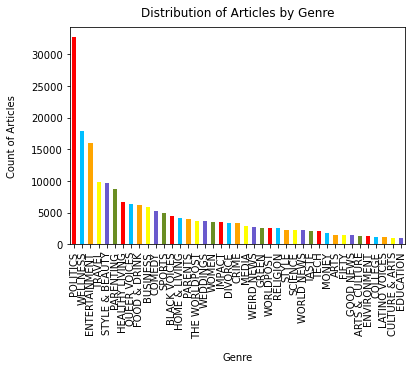

In [2]:
# Visualization of classes
colors = ['red', 'deepskyblue', 'orange', 'yellow', 'slateblue', 'olivedrab']


data['category'].value_counts().plot(kind='bar', color = colors)
plt.xlabel("Genre", labelpad=14)
plt.ylabel("Count of Articles", labelpad=14)
plt.title("Distribution of Articles by Genre", y=1.02)
plt.show()

In [3]:
from helper_functions import preprocess
df, genres = preprocess(data)

In [4]:
genres
genres_list = ['Politics', 'Wellness','Entertainment', 'Travel', 'Style & Beauty','Parenting']

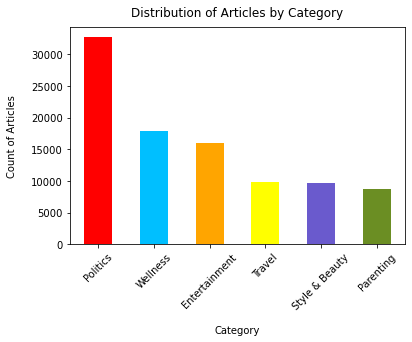

In [10]:
# Visualization of classes
colors = ['red', 'deepskyblue', 'orange', 'yellow', 'slateblue', 'olivedrab']


df['label'].value_counts().plot(kind='bar', color = colors)
plt.xlabel("Category", labelpad=14)
plt.ylabel("Count of Articles", labelpad=14)
plt.title("Distribution of Articles by Category", y=1.02)
plt.xticks(np.arange(6),genres_list, rotation=45)
plt.savefig('Plots/classes.png', bbox_inches = "tight")
plt.show()

In [11]:
sample_size = [1000, 2000, 4000, 6000, 10000, 15000, 20000, 40000]

**Logistic Regression**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Logistic Regression Model with fine-tuned parameters
logistic_regression = Pipeline(steps=[('preprocessor', TfidfVectorizer(stop_words='english',
                                                        ngram_range=(1,2),
                                                        binary=True)),
                                      ('model', LogisticRegression(max_iter=1000,
                                                                   class_weight='balanced',
                                                                   penalty='l2',
                                                                   solver='newton-cg'))])

In [ ]:
from helper_functions import model_performance
import time
import json

# Logistic Regression

lr_performance = {}
for n_obs in sample_size:
    lr_performance[n_obs]={}
    for n_class in range(2,7):
        lr_performance[n_obs][n_class]={}
        
        # Start time
        start_time = time.time()
        
        # Fit, predict, and evaluate model
        p, r, f1 = model_performance(logistic_regression, df, n_obs, n_class)
        
        # End time
        end_time = time.time()
        
        # Fill dict
        lr_performance[n_obs][n_class]['p']=p
        lr_performance[n_obs][n_class]['r']=r
        lr_performance[n_obs][n_class]['f1']=f1
        lr_performance[n_obs][n_class]['time']=end_time-start_time
        
# Save dictionary
json_lr = json.dumps(lr_performance)
f_lr = open("/content/drive/My Drive/Colab Notebooks/NLP/data/lr_performance.json", "w")
f_lr.write(json_lr)
f_lr.close()

**SVM**

In [ ]:
from sklearn.linear_model import SGDClassifier

# Support Vector Machine Model with fine-tuned parameters
svm = Pipeline(steps=[('preprocessor', TfidfVectorizer(stop_words='english',
                                                       binary=True,
                                                       ngram_range=(1,2))),
                      ('model', SGDClassifier(max_iter=1000,
                                              class_weight='balanced',
                                              learning_rate='adaptive',
                                              penalty='l2',
                                              n_jobs=-1,
                                              eta0=0.1))])

In [ ]:
#SVM

svm_performance = {}
for n_obs in sample_size:
    svm_performance[n_obs]={}
    for n_class in range(2,7):
        svm_performance[n_obs][n_class]={}
        
        # Start time
        start_time = time.time()
        
        # Fit, predict, and evaluate model
        p, r, f1 = model_performance(svm, df, n_obs, n_class)
        
        # End time
        end_time = time.time()
        
        # Fill dict
        svm_performance[n_obs][n_class]['p']=p
        svm_performance[n_obs][n_class]['r']=r
        svm_performance[n_obs][n_class]['f1']=f1
        svm_performance[n_obs][n_class]['time']=end_time-start_time
        
# Save dictionary
json_svm = json.dumps(svm_performance)
f_svm = open("/content/drive/My Drive/Colab Notebooks/NLP/data/svm_performance.json", "w")
f_svm.write(json_svm)
f_svm.close()

**Bert Transformer**

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import time
import json

# Model Arguments - ############ Fer un diccionari
model_args = {
    "num_train_epochs": 2,
    "use_multiprocessing":True,
    "reprocess_input_data":True,
    "overwrite_output_dir":True,
    "manual_seed":42

}

In [ ]:
from helper_functions import transformer_performance
import time
import json

# Transformer model

bert_performance={}
for n_obs in sample_size:
    bert_performance[n_obs]={}
    for n_class in range(2,7):
        bert_performance[n_obs][n_class]={}
        
        # Model 
        model = ClassificationModel(model_type='bert',
                                    model_name='bert-base-cased',
                                    use_cuda=True, num_labels=n_class,
                                    args=model_args)
        
        # Start time
        start_time = time.time()
        
        # Fit, predict, and evaluate model
        p, r, f1 = transformer_performance(model, df, n_obs, n_class)
        
        # End time
        end_time = time.time()
        
        # Fill dict
        bert_performance[n_obs][n_class]['p']=p
        bert_performance[n_obs][n_class]['r']=r
        bert_performance[n_obs][n_class]['f1']=f1
        bert_performance[n_obs][n_class]['time']=end_time-start_time
        
# Save dictionary
json_bert = json.dumps(bert_performance)
f_bert = open("/content/drive/My Drive/Colab Notebooks/NLP/data/bert_performance.json", "w")
f_bert.write(json_bert)
f_bert.close()